# Problem Statement :
Stayze is an online market for providing lodging or primary homestays. The company does not own any real estate or properties, it acts as a broker receiving commission from each booking. The hosts rent out their property, its availability, area, type of room, price etc. and the travellers can book accordingly. The travellers put in their reviews, which is visible to others. People have used this service extensively and the company is recognized throughout the globe. All the online activities of the hosts as well as the travellers are being captured and have resulted in a rich database.

This data can be used to gain business insights, make decisions, improve security, understand the customers' and providers' (hosts) behaviour and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

The stakeholders with the help of the available data want to know the ideal prices at which the properties can be rented, as it will help them decide upon the ideal investment to be done.

Can we build a machine learning model to predict the ideal price of the rental ?

Datasets :
The data folder data.zip that is provided to you contains the following files:

Train.csv - It is the training data containing the features, along with the price of the rentals.
Data_Dictionary.xlsx - It contains a brief description of every variable provided in the training and test set.
Test.csv: - It contains details of the customers for which the participants need to predict the price of the rentals.
sample_submission.csv - This is a sample file of the format in which you have to submit your predictions on GLabs.
Evaluation:
A solution with low root-mean-squared error (RMSE) based on cross-validation that can be reproduced and interpreted is ideal.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import math as mth
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
import time, warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 99%; }
    div#menubar-container     { width: 99%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

## 1.Import Test and Train data

In [14]:
train_data=pd.read_csv('Train.csv')
test_data=pd.read_csv('Test.csv')

### Create copy of train and test data

In [15]:
df=train_data.copy()
df_test=test_data.copy()

In [16]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.422600e+04,3.422600e+04,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,27244.000000,34226.000000,34226.000000
mean,1.898209e+07,6.733847e+07,40.729059,-73.952070,153.480979,6.953690,23.390931,1.377074,7.093905,113.301730
std,1.097597e+07,7.833091e+07,0.054604,0.046161,243.312608,20.255833,44.476822,1.688953,32.828412,131.892814
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.460366e+06,7.824440e+06,40.690040,-73.983150,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.965371e+07,3.065628e+07,40.722995,-73.955700,107.000000,2.000000,5.000000,0.730000,1.000000,45.000000
75%,2.908201e+07,1.074344e+08,40.763200,-73.935982,175.000000,5.000000,24.000000,2.020000,2.000000,229.000000
max,3.648724e+07,2.743115e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [17]:
df_test.describe()

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.466900e+04,1.466900e+04,14669.000000,14669.000000,14669.000000,14669.000000,11599.000000,14669.000000,14669.000000
mean,1.909894e+07,6.827691e+07,40.728693,-73.952402,7.207921,23.002727,1.364172,7.260822,111.567114
std,1.099968e+07,7.925935e+07,0.054359,0.046148,21.092531,44.722549,1.660318,33.241116,130.985364
min,2.539000e+03,2.787000e+03,40.506410,-74.242850,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.493324e+06,7.809661e+06,40.690160,-73.982890,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.972191e+07,3.121494e+07,40.723220,-73.955640,3.000000,5.000000,0.700000,1.000000,44.000000
75%,2.931293e+07,1.074344e+08,40.762950,-73.936860,5.000000,23.000000,2.020000,2.000000,223.000000
max,3.648409e+07,2.743213e+08,40.908040,-73.716900,999.000000,594.000000,20.940000,327.000000,365.000000


In [18]:
#check for Null Values in train
df.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           13
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       6982
reviews_per_month                 6982
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [19]:
#check for null values in test
df_test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            8
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       3070
reviews_per_month                 3070
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [20]:
#function to drop unwanted columns
def drop_col(df):
    df.drop(columns=['id','name','host_id','host_name'],inplace=True)

#Apply function on train data
drop_col(df)


#Apply function on test data
drop_col(df_test)

In [23]:
def remove_null(df):
    for v in list(df.columns):
        if df[v].isnull().sum() > 0:
            df[v]= df[v].fillna(0)

#remove null from train
remove_null(df)

#remove_null from test
remove_null(df_test)

In [24]:
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [25]:
df_test.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Created a fucntion that will loop through each neighborhood_group and will find minimum value for **last_review" and 


In [37]:
def treat_last_review(df):
    df['year'] = pd.to_datetime(df['last_review']).dt.year
    
    def flag(x):
        if x == 1970:
            return 'Not Availyeable'
        elif x >= 2015 and x < 2019:
            return 'Not Recently Reviewed'
        elif x == 2019:
            return 'Recently Reviewed'
    
    df['review'] = df['year'].apply(lambda x: flag(x))
    
    df.drop(columns=['year','last_review'],axis=1,inplace=True)

In [38]:
treat_last_review(df)

In [39]:
treat_last_review(df_test)

In [40]:
## Create list to to store categoarical and numerical variables from train and test data
cat_var=[col for col in df.columns if df[col].dtype=='O']
num_var=[col for col in df.columns if col not in cat_var]

cat_var_test=[col for col in df_test.columns if df_test[col].dtype=='O']
num_var_test=[col for col in df_test.columns if col not in cat_var_test]

In [41]:
print(cat_var)
print(num_var)

['neighbourhood_group', 'neighbourhood', 'room_type', 'review']
['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [42]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,review
0,Manhattan,Nolita,40.72217,-73.99481,Private room,120,7,3,0.06,3,0,Not Recently Reviewed
1,Manhattan,Upper West Side,40.80020,-73.96045,Entire home/apt,1500,1,0,0.00,1,0,Not Availyeable
2,Queens,East Elmhurst,40.75558,-73.89316,Entire home/apt,200,2,4,4.00,1,365,Recently Reviewed
3,Staten Island,Concord,40.60110,-74.07830,Shared room,30,2,0,0.00,4,82,Not Availyeable
4,Manhattan,Harlem,40.81022,-73.94266,Shared room,115,1,16,0.27,1,365,Recently Reviewed


## 2.Categorical variables

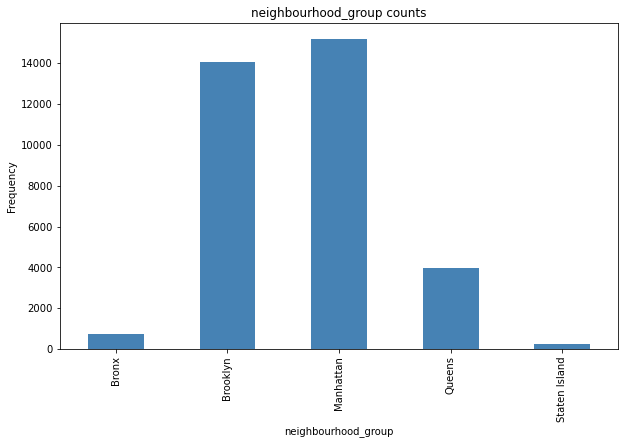

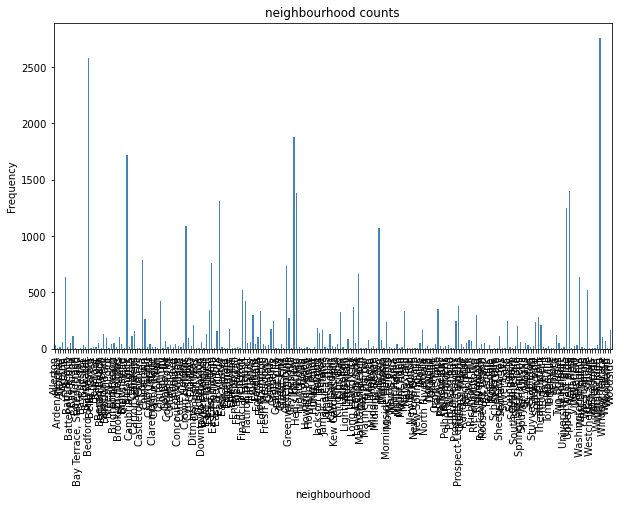

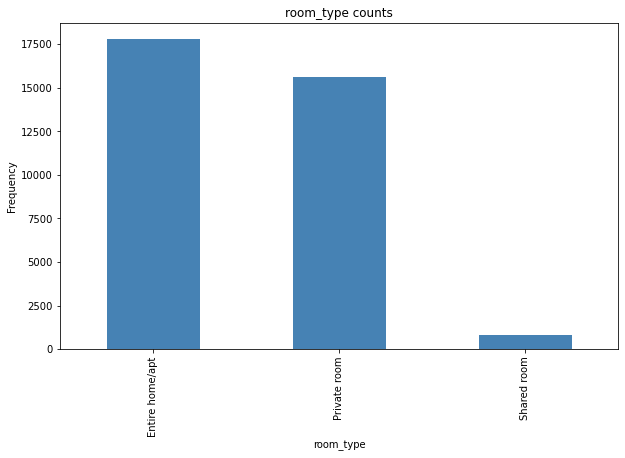

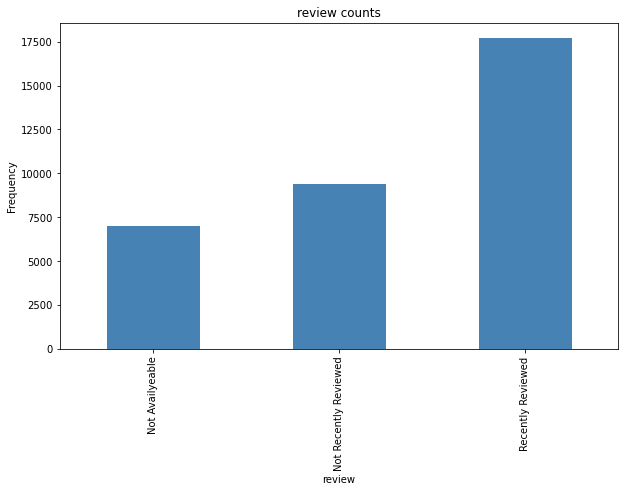

In [43]:
for col in cat_var:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(10, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

Check how price is destributed along categorical vars

In [46]:
def show_price_dist(df,var):
    
    
    fig = plt.figure(figsize=(10,8))

    # Plot mean
    mean = df['price'].mean()
    print(df.groupby(var)['price'].mean().sort_values())
    df.groupby(var)['price'].mean().sort_values().plot.bar()
    plt.axhline(y=mean, color = 'red', linestyle='dashed', linewidth = 1)
    plt.text(x=0, y=mean,s=(str('Mean'),round(mean,2)),fontsize=12)
    # Add titles and labels
    plt.title(f'price distribution across {var}')
    plt.xlabel(var)
    plt.ylabel('price')
  


    # Show the figure
    plt.show()

neighbourhood_group
Bronx             88.146023
Queens            98.661731
Staten Island    118.491935
Brooklyn         125.868880
Manhattan        197.233002
Name: price, dtype: float64


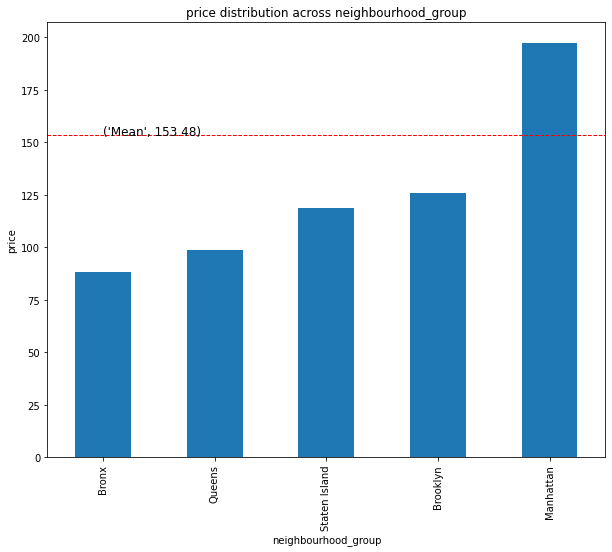

In [47]:
show_price_dist('neighbourhood_group')

room_type
Shared room         72.115816
Private room        89.420482
Entire home/apt    213.175613
Name: price, dtype: float64


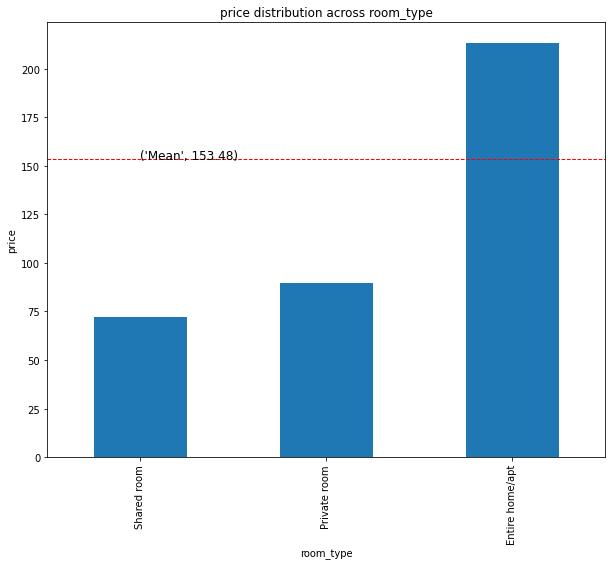

In [48]:
show_price_dist('room_type')

review
Recently Reviewed        141.190218
Not Recently Reviewed    144.250934
Not Availyeable          196.845173
Name: price, dtype: float64


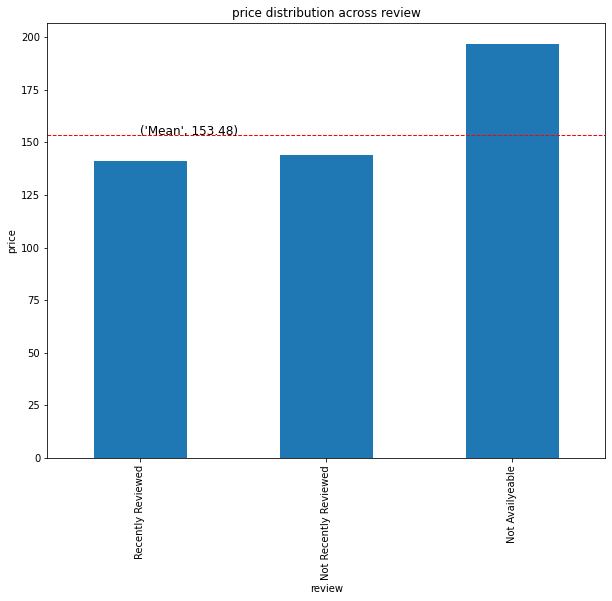

In [49]:
show_price_dist('review')

## Outliers by categories

<AxesSubplot:title={'center':'price'}, xlabel='neighbourhood_group'>

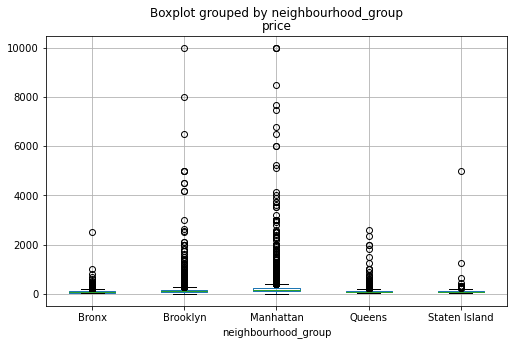

In [50]:
df.boxplot(column='price', by='neighbourhood_group', figsize=(8,5))

<AxesSubplot:title={'center':'price'}, xlabel='room_type'>

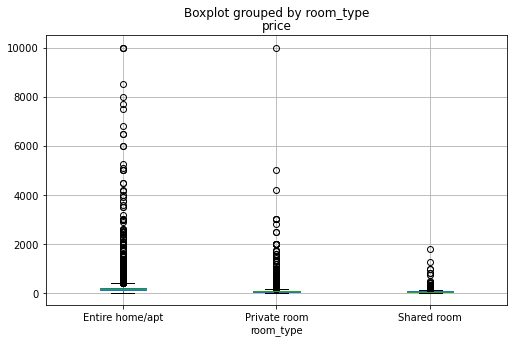

In [51]:
df.boxplot(column='price', by='room_type', figsize=(8,5))

<AxesSubplot:title={'center':'price'}, xlabel='review'>

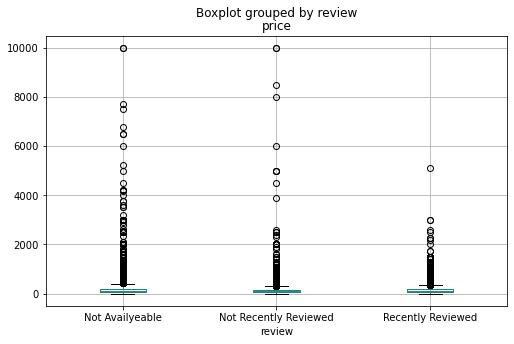

In [52]:
df.boxplot(column='price', by='review', figsize=(8,5))

Text(0.5, 1.0, 'Map showing neighbourhood groups')

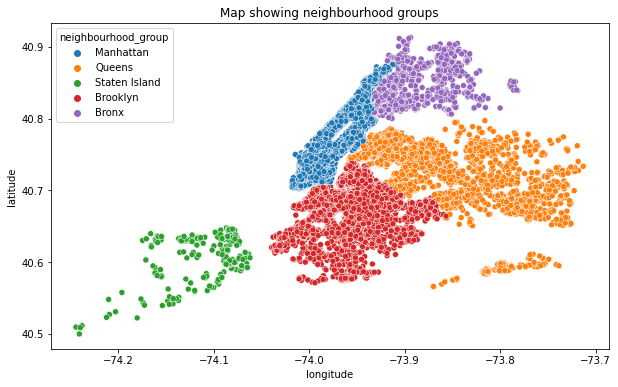

In [53]:
plt.figure(figsize=(10,6))
sns.scatterplot(data= df, x= 'longitude', y= 'latitude', hue='neighbourhood_group')
plt.title('Map showing neighbourhood groups')

## 3.Distribution of numeric variables

### Created function to show distribution and outliers for numerical features

In [59]:
# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt
    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,8))

    # Plot the histogram   
    ax[0].hist(var_data,alpha=0.5,bins=100)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle(f'Data Distribution')

    # Show the figure
    fig.show()

### Created functinn to show density of a feature

In [55]:
def show_density(var_data):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(10,8))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

Distribtion for latitude
Minimum:40.50
Mean:40.73
Median:40.72
Mode:40.72
Maximum:40.91



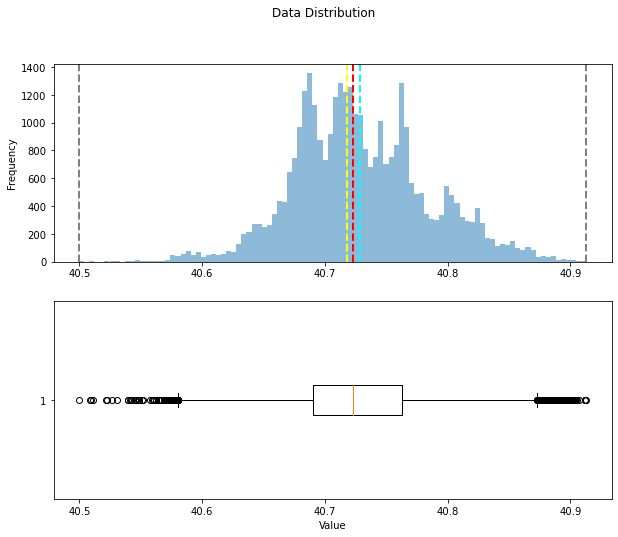

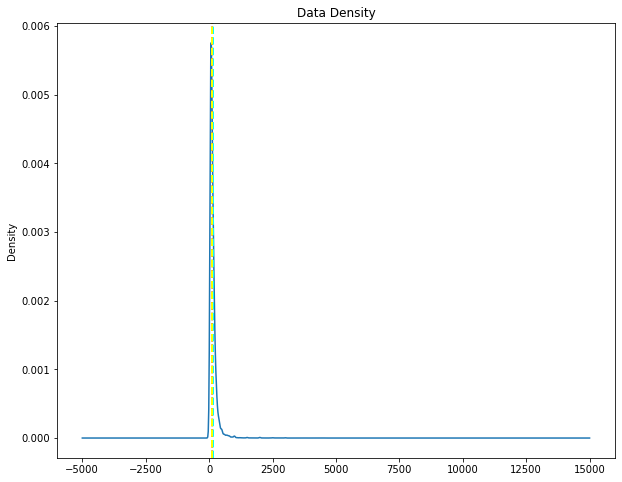

****************************************************************************************************
                                                                                                    
Distribtion for longitude
Minimum:-74.24
Mean:-73.95
Median:-73.96
Mode:-73.96
Maximum:-73.71



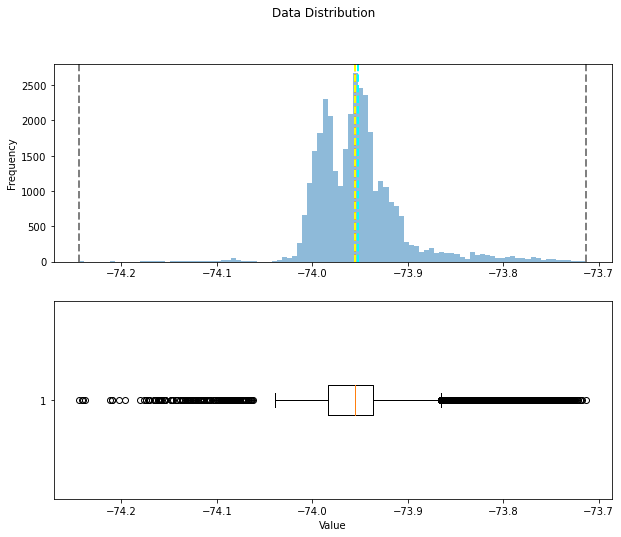

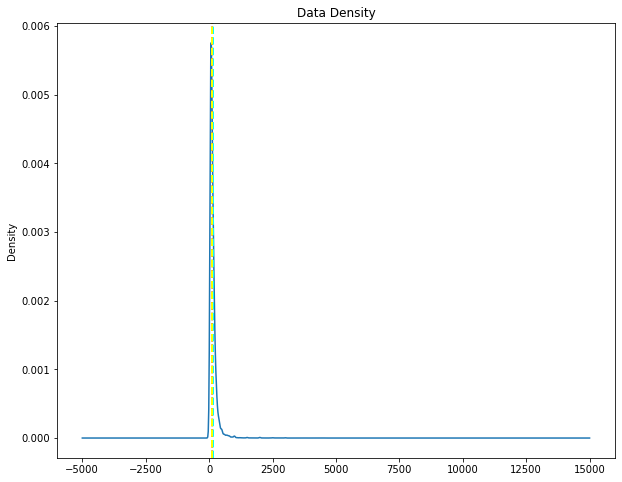

****************************************************************************************************
                                                                                                    
Distribtion for price
Minimum:0.00
Mean:153.48
Median:107.00
Mode:100.00
Maximum:10000.00



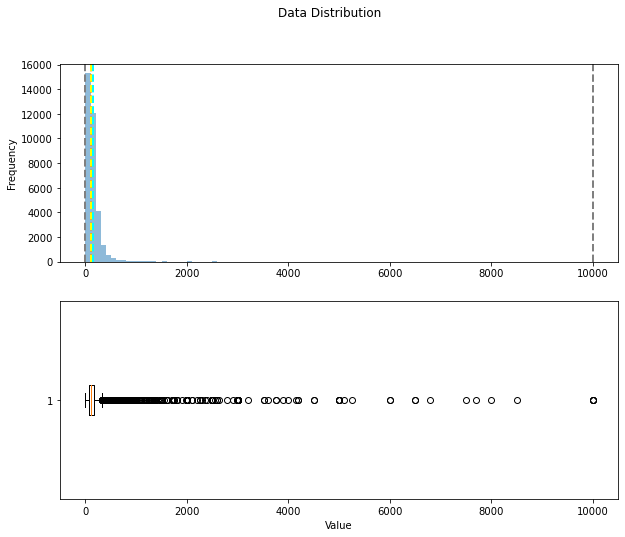

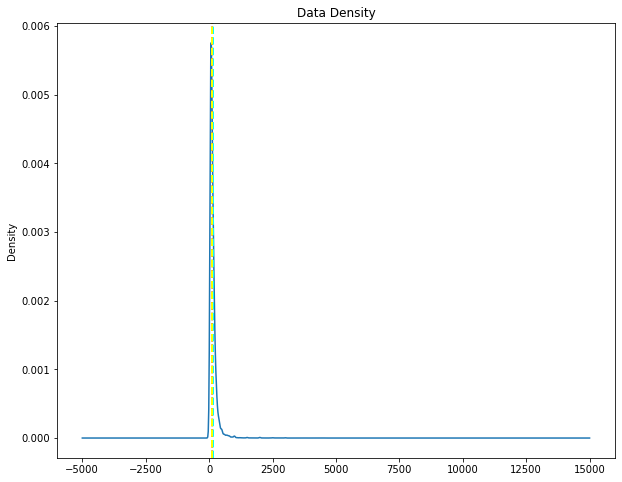

****************************************************************************************************
                                                                                                    
Distribtion for minimum_nights
Minimum:1.00
Mean:6.95
Median:2.00
Mode:1.00
Maximum:1250.00



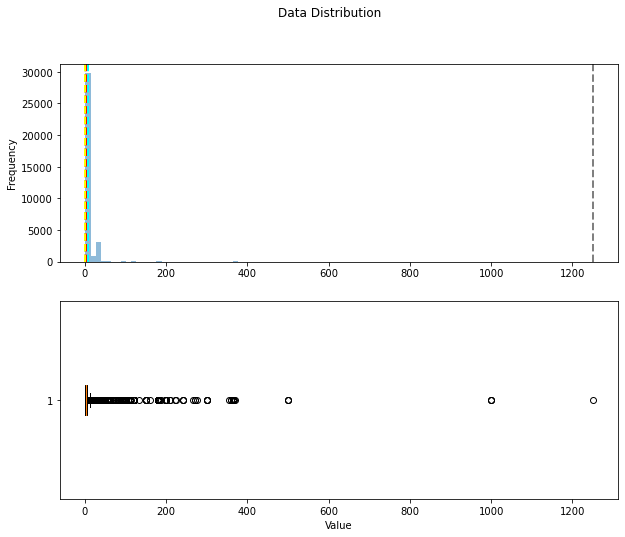

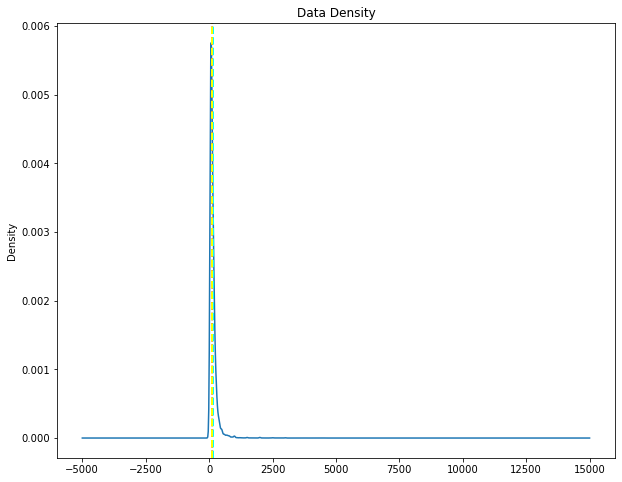

****************************************************************************************************
                                                                                                    
Distribtion for number_of_reviews
Minimum:0.00
Mean:23.39
Median:5.00
Mode:0.00
Maximum:629.00



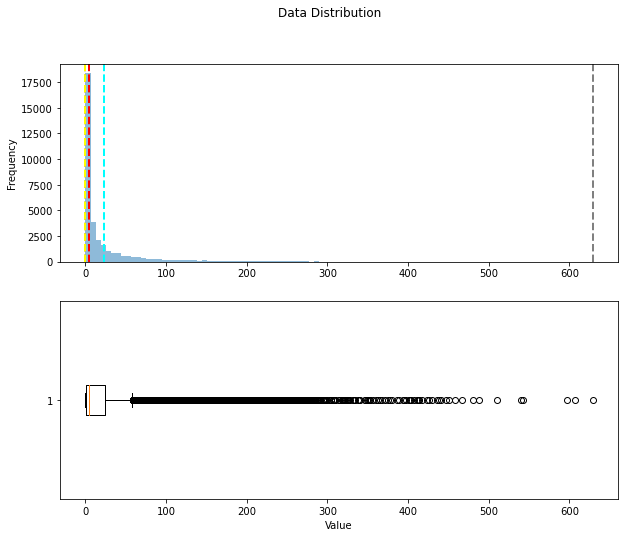

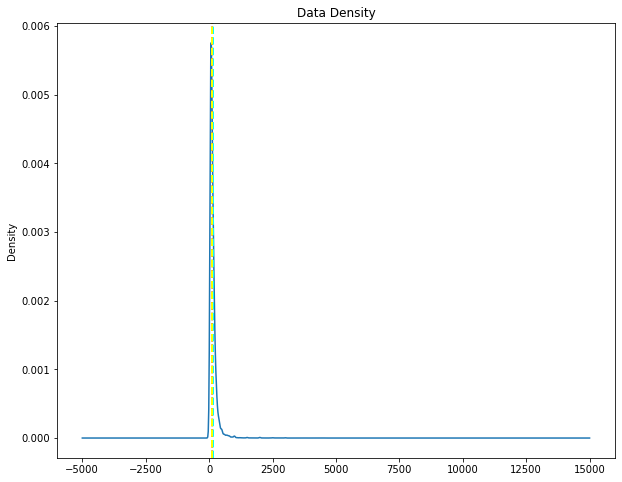

****************************************************************************************************
                                                                                                    
Distribtion for reviews_per_month
Minimum:0.00
Mean:1.10
Median:0.38
Mode:0.00
Maximum:58.50



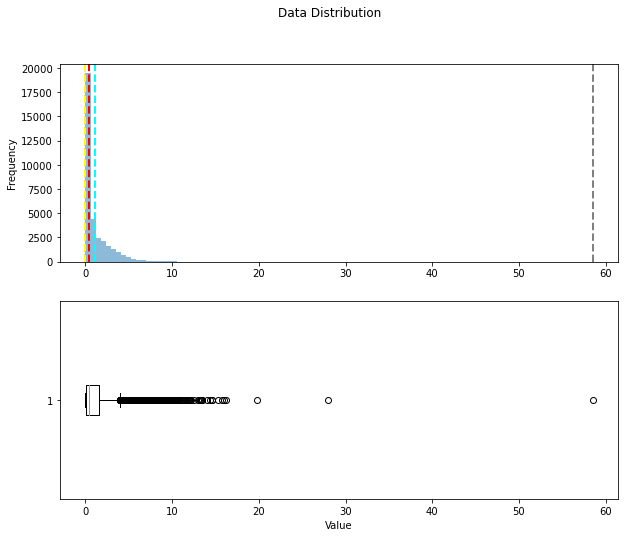

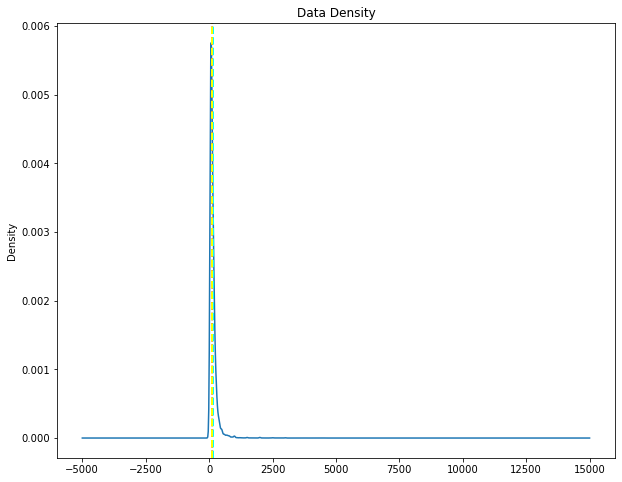

****************************************************************************************************
                                                                                                    
Distribtion for calculated_host_listings_count
Minimum:1.00
Mean:7.09
Median:1.00
Mode:1.00
Maximum:327.00



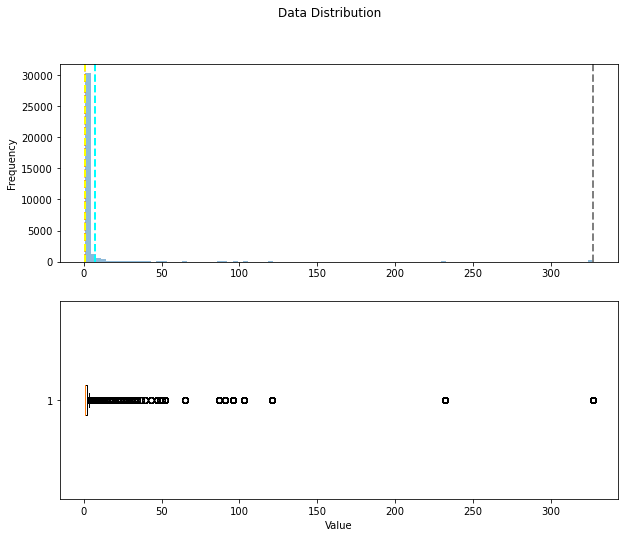

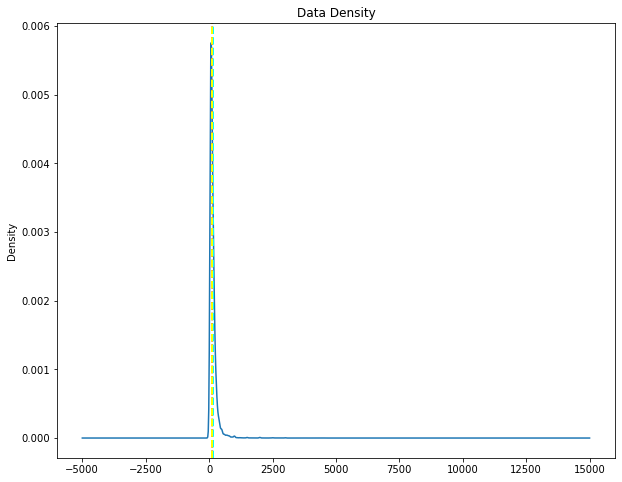

****************************************************************************************************
                                                                                                    
Distribtion for availability_365
Minimum:0.00
Mean:113.30
Median:45.00
Mode:0.00
Maximum:365.00



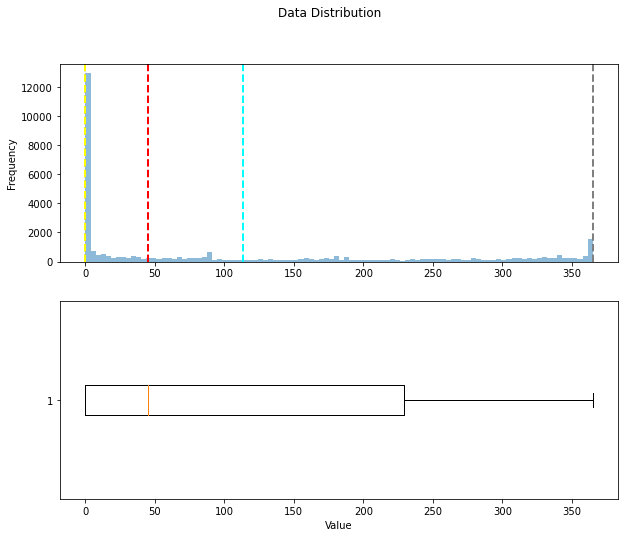

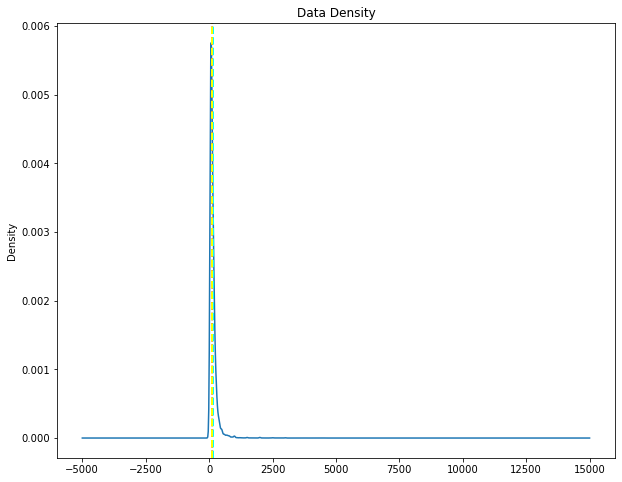

****************************************************************************************************
                                                                                                    


In [69]:
for n in num_var:
    col1 = df[n]
    print(f'Distribtion for {n}')
    show_distribution(col1)
    show_density(col)
    print('*'*100)
    print(' '*100)
    

## Relationship between independent and dependent features(price)

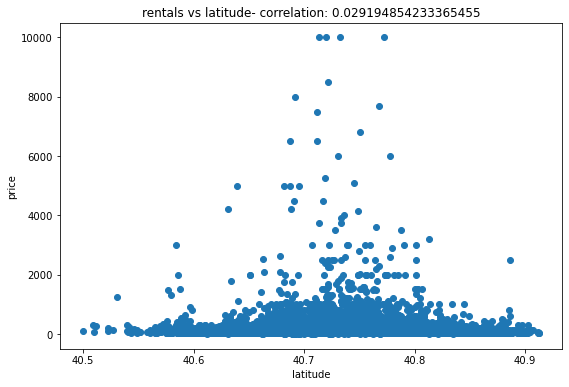

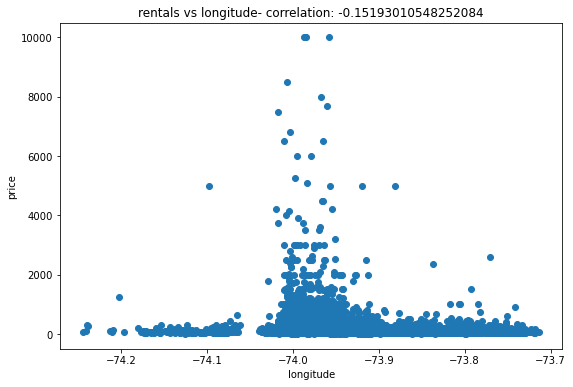

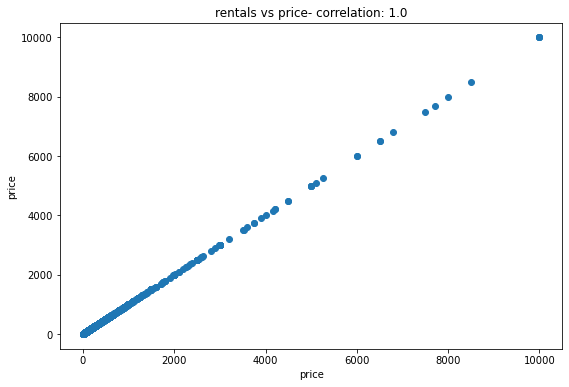

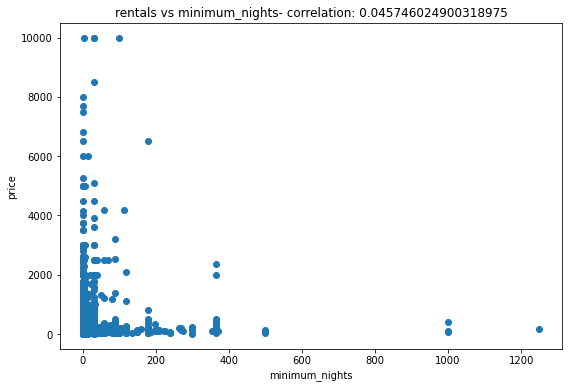

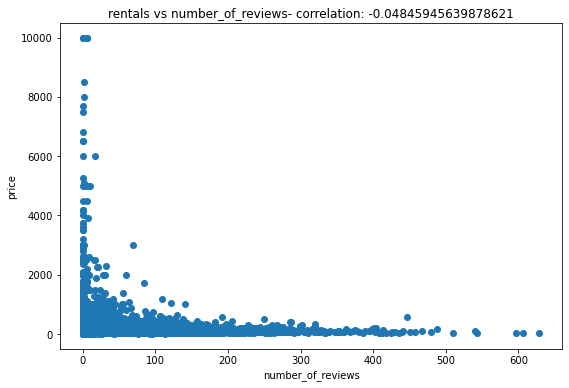

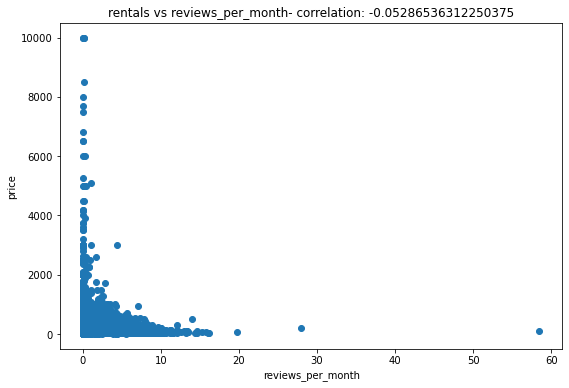

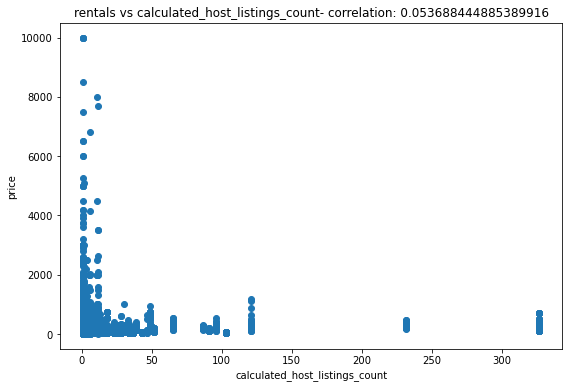

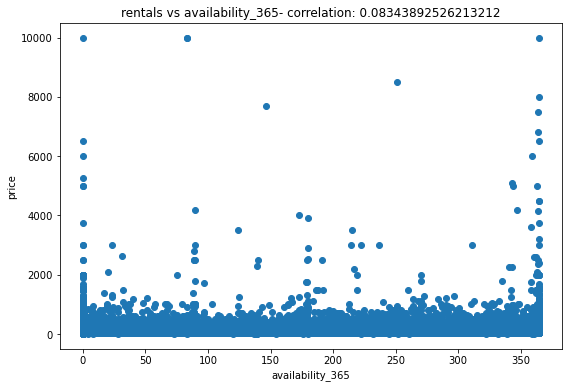

In [70]:
for col in num_var:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['price']
    correlation = feature.corr(label)  
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('price')
    ax.set_title('rentals vs ' + col + '- correlation: ' + str(correlation))
plt.show()

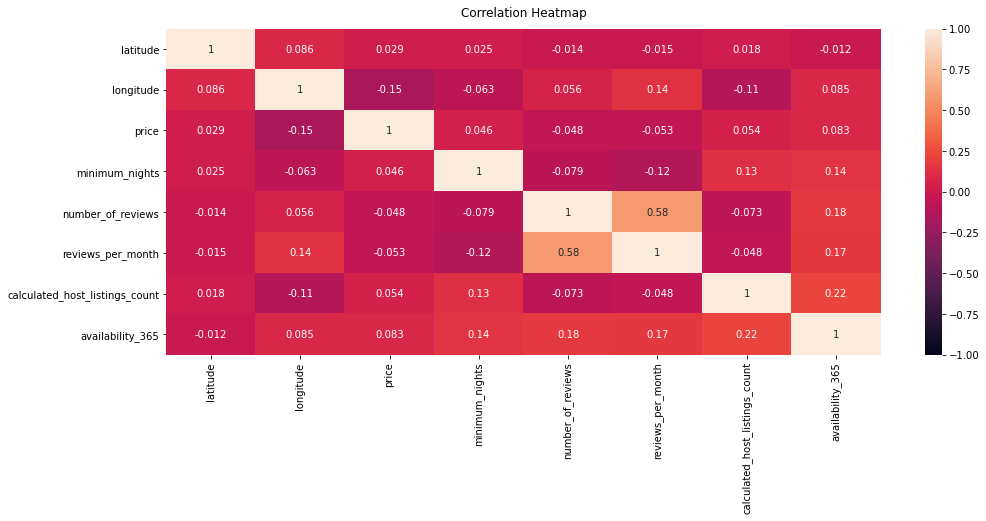

In [71]:
plt.figure(figsize=(16, 6))
heatmap=sns.heatmap(df[num_var].corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## skweness check prior capping

In [72]:
# check for skewness
for cols in num_var:
    print('{} : {}'.format(cols,df[cols].skew()))

latitude : 0.23997316224203094
longitude : 1.2772627430214962
price : 18.815093682550792
minimum_nights : 23.999268051286446
number_of_reviews : 3.6453649218348216
reviews_per_month : 3.6261179394883563
calculated_host_listings_count : 7.9697075008278535
availability_365 : 0.7559912498636655


## Create Function for lower and upper level capping to mini

In [73]:
def percentile_capping(df, cols, from_low_end, from_high_end):
    
    for col in cols:
        
#         lower_bound = df[col].quantile(from_low_end)
#         upper_bound = df[col].quantile(1-from_high_end)
        
#         df[col] = np.where(df[col]>upper_bound, upper_bound,
#                  np.where(df[col]<lower_bound, lower_bound, df[col]))

        stats.mstats.winsorize(a=df[col], limits=(from_low_end, from_high_end), inplace=True)

In [74]:
# fourth argument of 0.01 from right end is equivalent to saying
# 1-0.01 = 0.99 quantile from the left end
from scipy import stats
features_skewed=['price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count']
percentile_capping(df, features_skewed, 0.01, 0.01)

## skweness check post capping

In [75]:
for cols in num_var:
    print('{} : {}'.format(cols,df[cols].skew()))

latitude : 0.23997316224203094
longitude : 1.2772627430214962
price : 2.778655769725444
minimum_nights : 2.379500311506332
number_of_reviews : 2.7384811429631393
reviews_per_month : 1.7922058959236262
calculated_host_listings_count : 7.1044214266912595
availability_365 : 0.7559912498636655


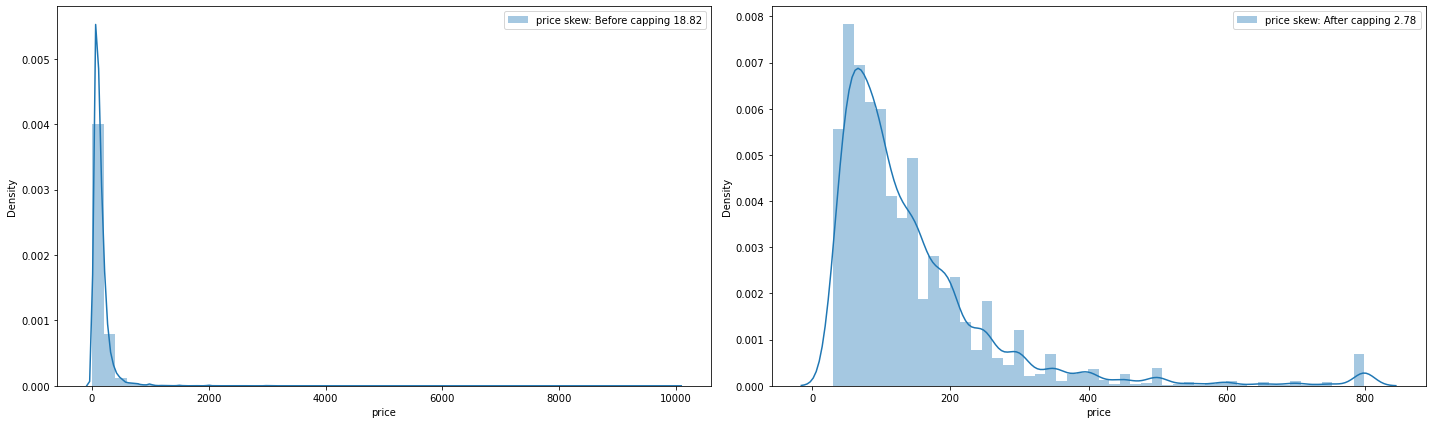

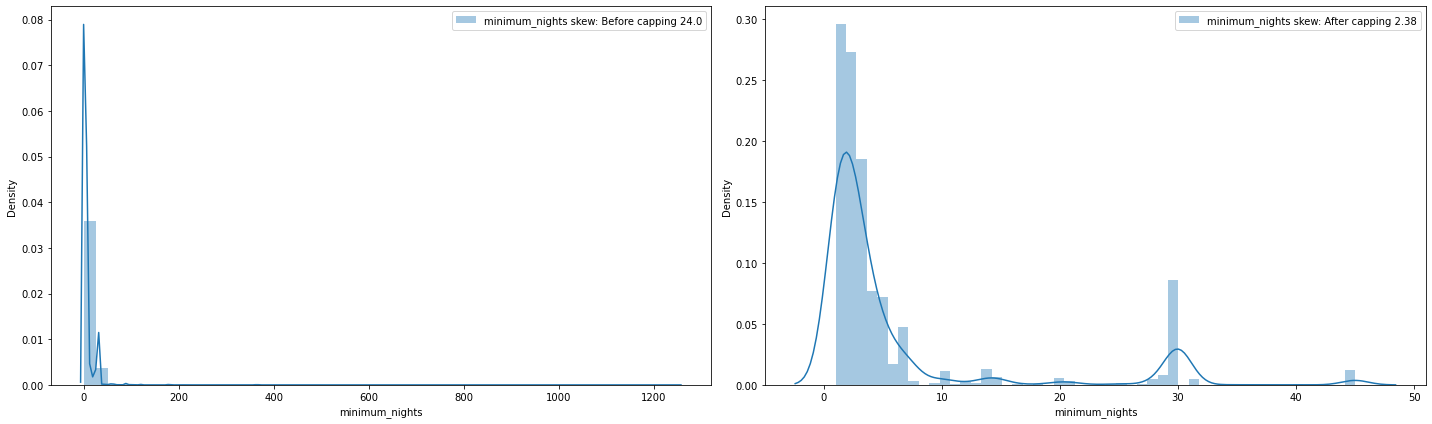

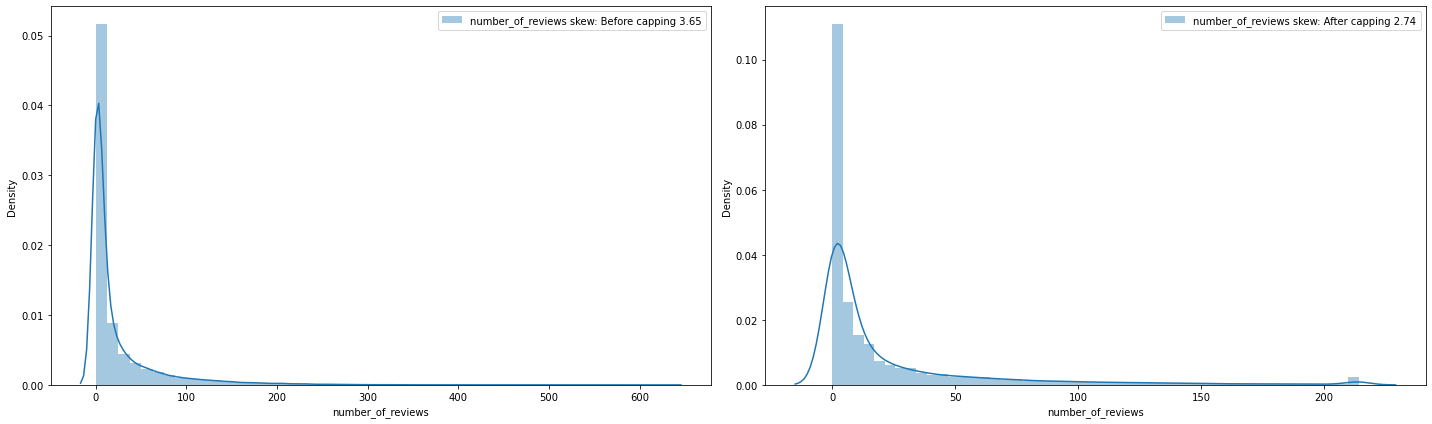

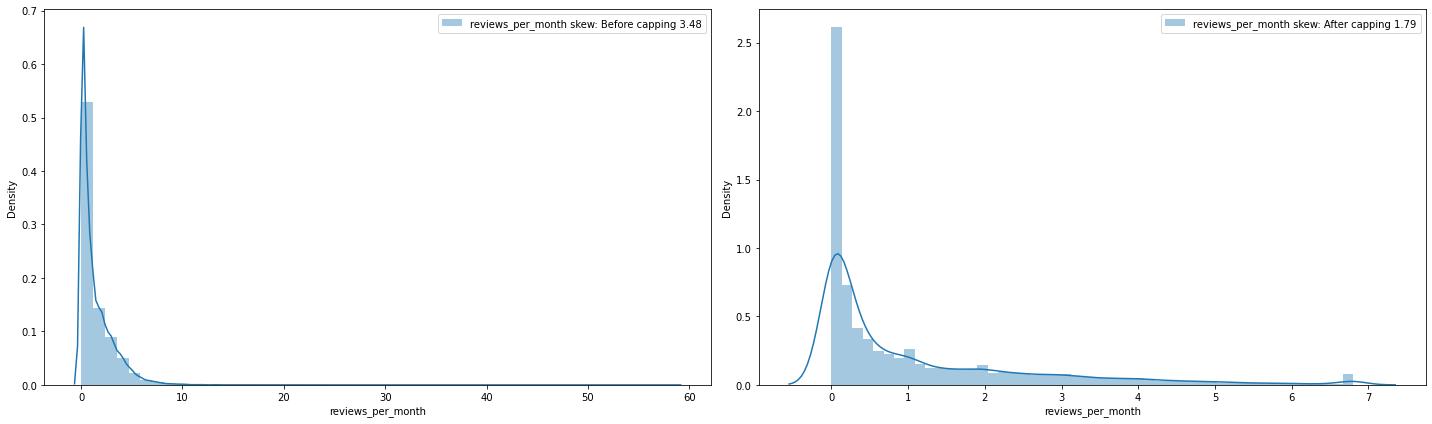

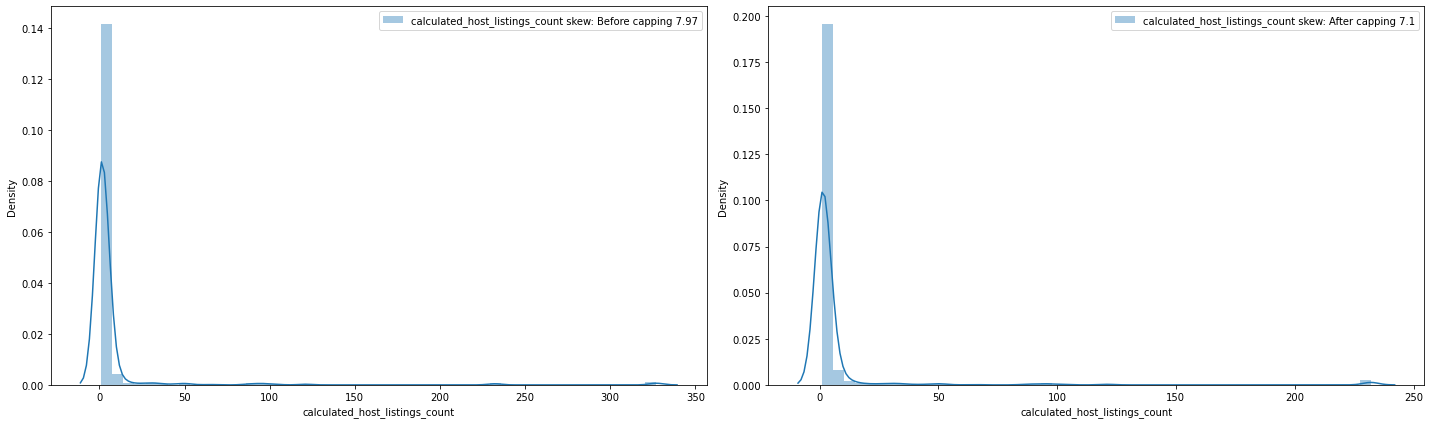

In [81]:
 for col in features_skewed:
            plt.figure(figsize=(20,6))
            plt.subplot(121)
            sns.distplot(train_data[col], label=f"{col} skew: Before capping " + str(np.round(train_data[col].skew(),2)))
            plt.legend()
            plt.subplot(122)
            sns.distplot(df[col], label=f"{col} skew: After capping " + str(np.round(df[col].skew(),2)))
            plt.legend()
            plt.tight_layout()
            plt.show()

### In order use categorical variables in model buidling we need to encode them as numeric values, so that we use them numeric features

In [94]:
def enode_vars(f):
    
    #encoding categorical features
    neighbr = pd.get_dummies(f.neighbourhood, prefix='neighbourhood', prefix_sep='_',drop_first=True)

    neighb_grp=pd.get_dummies(f['neighbourhood_group'], drop_first=True)
    #neighb_grp.head()


    rm_type=pd.get_dummies(f['room_type'], drop_first=True)
    #rm_type.head()
    
    if str(f) == str(df):
        return pd.concat([f[num_var],neighbr,neighb_grp,rm_type],axis=1)
    else:
        return pd.concat([f[num_var_test],neighbr,neighb_grp,rm_type],axis=1)
    

In [95]:
#Apply encoding to train dataset and store updated dataframe  in df_f 
df_f = enode_vars(df)

#check if encoding has happened
df_f.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_Arden Heights,neighbourhood_Arrochar,...,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,Brooklyn,Manhattan,Queens,Staten Island,Private room,Shared room
0,40.72217,-73.99481,120,7,3,0.06,3,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,40.80020,-73.96045,799,1,0,0.00,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,40.75558,-73.89316,200,2,4,4.00,1,365,0,0,...,0,0,0,0,0,0,1,0,0,0
3,40.60110,-74.07830,30,2,0,0.00,4,82,0,0,...,0,0,0,0,0,0,0,1,0,1
4,40.81022,-73.94266,115,1,16,0.27,1,365,0,0,...,0,0,0,0,0,1,0,0,0,1


In [96]:
#Apply encoding to test dataset and store updated dataframe  in df_test_f 
df_test_f = enode_vars(df_test)

#check if encoding has happened
df_test_f.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,...,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,Brooklyn,Manhattan,Queens,Staten Island,Private room,Shared room
0,40.66751,-73.95867,2,121,1.70,1,39,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,40.75655,-73.99690,1,18,2.49,30,364,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,40.69252,-73.99121,1,87,4.29,1,108,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,40.77292,-73.90101,9,0,0.00,2,365,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,40.71863,-73.94980,1,28,14.00,2,20,0,0,0,...,0,0,0,0,1,0,0,0,1,0


### Train and Test datasets had differnet values for neighbourhood column so after ecoding this columns , total number of column is not matching for test and train data.. in order to make these  two dataframes ar same level we need to align them so that these should have same number of clumns.

In [97]:
y=df_f.price.values
X=df_f.drop(columns=['price'])

In [98]:
final_train, final_test = X.align(df_test_f, join='inner', axis=1)  # inner join 

In [100]:
#Validate that shape for new test and train data is same for column numbers
print('Shape of Train after encoding and aligning:',final_train.shape)
print('Shape of Test after encoding and aligning:',final_test.shape)

Shape of Train after encoding and aligning: (34226, 215)
Shape of Test after encoding and aligning: (14669, 215)


Columns are same in train and test, so we are good to proceed for model preparation.

## Import libraries needed for Model prep

In [101]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.feature_selection import RFE
import eli5

from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import xgboost as xgb

## Bring fetured from train and test at same level

In [130]:
ss = StandardScaler()
X = ss.fit_transform(final_train)
test_X = ss.transform(final_test)

In [131]:
#split train data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)

In [132]:
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 27380 rows
Test Set: 6846 rows


---

## Linear Model

In [138]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr)
#y_pred = lr.predict(X_val)
y_pred = lr.predict(X_test)

print('Test RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test, y_pred)

print('The R^2 value is: ', r2)



LinearRegression()
Test RMSE: 84047643995670.5
The R^2 value is:  -4.676084532362664e+23


In [139]:
en = Ridge()
ypred_en = en.fit(X_train,y_train).predict(X_test)
ypred_train=en.predict(X_train)
en_rmse = np.sqrt(mean_squared_error(y_test,ypred_en))
print('test rmse: ', round(en_rmse,3))
r2 = r2_score(y_test, ypred_en)

print('The R^2 value is: ', r2)

test rmse:  98.162
The R^2 value is:  0.3621568649896052


In [140]:
ridge_results = pd.DataFrame({'algorithm':['Ridge'],
            'training RMSE': [np.sqrt(mean_squared_error(y_train, ypred_train))],
            'test RMSE': [np.sqrt(mean_squared_error(y_test, ypred_en))],
            'training r2_score': [r2_score(y_train, ypred_train)],
            'test r2_score': [r2_score(y_test, ypred_en)]})

In [141]:
ridge_results

,algorithm,training RMSE,test RMSE,training r2_score,test r2_score
0,Ridge,98.464825,98.161528,0.354985,0.362157


---

## XGBRegressor

In [142]:
grid_xgb = XGBRegressor(objective='reg:squarederror',n_jobs=-1,subsample = 0.7, scale_pos_weight= 5, reg_lambda= 4, n_estimators = 110, min_child_weight= 13, max_depth = 12, learning_rate= 0.1, colsample_bytree = 0.9, colsample_bynode= 0.9)
grid_xgb.fit(X_train,y_train)
xgb_pred_train = grid_xgb.predict(X_train)
xgb_pred1 = grid_xgb.predict(X_test)

print('Test RMSE:',np.sqrt(mean_squared_error(y_test, xgb_pred1)))
print("R2_score: ",r2_score(y_test,xgb_pred1))

Test RMSE: 91.91032496551402
R2_score:  0.440809391351224


In [143]:
xgb_best_results = pd.DataFrame({'algorithm':['XGBRegressor'],
            'training RMSE': [np.sqrt(mean_squared_error(y_train, xgb_pred_train))],
            'test RMSE': [np.sqrt(mean_squared_error(y_test, xgb_pred1))],
            'training r2_score': [r2_score(y_train, xgb_pred_train)],
            'test r2_score': [r2_score(y_test, xgb_pred1)]})

In [144]:
xgb_best_results 

,algorithm,training RMSE,test RMSE,training r2_score,test r2_score
0,XGBRegressor,67.193723,91.910325,0.699624,0.440809


In [150]:
#from eli5 import show_weights
#eli5.show_weights(grid_xgb, feature_names=list(final_train.columns))

---

## Random Forest

In [151]:
rf_model = RandomForestRegressor(random_state=33)
param_grid = dict(n_estimators=range(10,100,10),max_depth=range(3,20),min_samples_split=range(10,400,20),min_samples_leaf=range(5,75,10),max_leaf_nodes=range(8,32,2))
grid_rf = RandomizedSearchCV(rf_model,param_grid,scoring='neg_mean_squared_error',n_jobs=-1,cv=5,random_state=33)
grid_rf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=33),
                   n_jobs=-1,
                   param_distributions={'max_depth': range(3, 20),
                                        'max_leaf_nodes': range(8, 32, 2),
                                        'min_samples_leaf': range(5, 75, 10),
                                        'min_samples_split': range(10, 400, 20),
                                        'n_estimators': range(10, 100, 10)},
                   random_state=33, scoring='neg_mean_squared_error')

In [152]:
rf_pred_train = grid_rf.predict(X_train)
rf_pred = grid_rf.predict(X_test)

print('Test RMSE:',np.sqrt(mean_squared_error(y_test, rf_pred)))
print("R2_score: ",r2_score(y_test,rf_pred))

Test RMSE: 97.46438094835385
R2_score:  0.3711846667832768


In [153]:
rf_best_results = pd.DataFrame({'algorithm':['RandomForestRegressor'],
            'training RMSE': [np.sqrt(mean_squared_error(y_train, rf_pred_train))],
            'test RMSE': [np.sqrt(mean_squared_error(y_test, rf_pred))],
            'training r2_score': [r2_score(y_train, rf_pred_train)],
            'test r2_score': [r2_score(y_test, rf_pred)]})

In [154]:
rf_best_results

,algorithm,training RMSE,test RMSE,training r2_score,test r2_score
0,RandomForestRegressor,96.89544,97.464381,0.375382,0.371185


---

## Compare Models

In [155]:
pd.concat([ridge_results, rf_best_results, xgb_best_results], axis=0, ignore_index=True)

,algorithm,training RMSE,test RMSE,training r2_score,test r2_score
0,Ridge,98.464825,98.161528,0.354985,0.362157
1,RandomForestRegressor,96.895440,97.464381,0.375382,0.371185
2,XGBRegressor,67.193723,91.910325,0.699624,0.440809


---

### From above chart it is clear that XGBRegressor algo has given best result on test data

In [156]:
price_predicted=grid_xgb.predict(test_X)

---

## Add price column to test data, using price_predicted variable

In [158]:
test_data.shape

(14669, 15)

In [159]:
test_data['price'] = price_predicted

In [160]:
test_data.shape

(14669, 16)

## Price column added to the test data